Plots showing how the ML inputs and outputs look. 

In [1]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt

In [30]:
from datatree import open_datatree
import xgcm

In [91]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../modules/')
import useful_classes

In [92]:
MITgcm_bucket ='gs://leap-persistent/dhruvbalwada/m2lines_transfer'
P2L_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/'

In [59]:
Lstr = '100'
Lint = int(L)
# MITgcm 
#ds_ML = xr.open_zarr(f'{M2LINES_BUCKET}/ML_data/ds_ML_'+L+'km_3D')
fname = f'{MITgcm_bucket}/ML_data/ds_ML_'+L+'km_3D'

# MOM6 Phillips 2 layer
#ds_ML = xr.open_zarr(f'{P2L_bucket}res4km_sponge10day_long_ml_data_'+L+'km.zarr')

In [93]:
# Open the class and do the necessary steps
ML_data = useful_classes.MITgcm_transformer(fname, Lint)
ML_data.read_dataset()
ML_data.transform_vars()
ML_data.remove_boundary(largest_remove=False)

Dataset loaded from gs://leap-persistent/dhruvbalwada/m2lines_transfer/ML_data/ds_ML_100km_3D
Centered


In [94]:
ds = ML_data.ML_dataset.isel(time=-1).sel(Z=-500, method='nearest')

In [95]:
ds = ds.assign_coords({'XC': ds.XC/1e3, 'YC': ds.YC/1e3})              

In [97]:
def panel(var): 
    ds[var].plot(robust=True) 
    plt.ylim([0, 2000]) 
    plt.xlabel('X [km]')
    plt.ylabel('Y [km]')
    plt.title('')

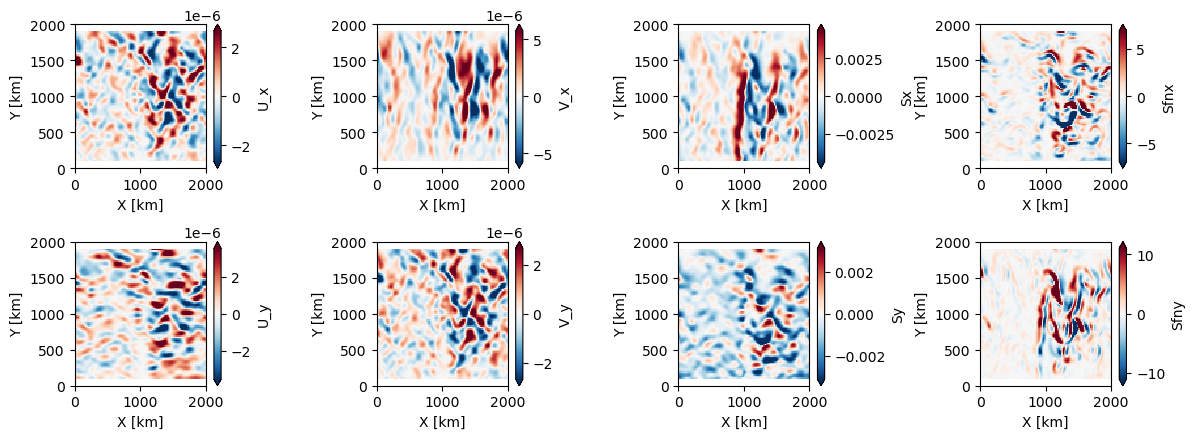

In [100]:
plt.figure(figsize=(15,6))

plt.subplot(241)
panel('U_x')

plt.subplot(245)
panel('U_y')

plt.subplot(242)
panel('V_x')

plt.subplot(246)
panel('V_y')

plt.subplot(243)
panel('Sx')

plt.subplot(247)
panel('Sy')

plt.subplot(244)
panel('Sfnx')

plt.subplot(248)
panel('Sfny')

plt.tight_layout()
plt.savefig('figure2.png', dpi=250)